# Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import plot_tree
from itertools import product
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()

reference_dir = os.getenv("reference_dir")
pricing_results_dir = os.getenv("pricing_results_dir")

df_prep = pd.read_csv(os.path.join(reference_dir, "dataco_single_product.csv"))

merged_prep = pd.read_csv(os.path.join(reference_dir, "dataco_olist_single_product.csv"))


# sklearn DT with dataco only

In [3]:
df_prep

,dataco_avg_item_discount,dataco_avg_item_discount_rate,dataco_demand,Final Price,price_elasticity_of_demand,Seasonality_Encoded
0,6.103950,0.047352,4458,53.885548,0.000000,2
1,6.080249,0.045197,4183,53.909197,15.886807,2
2,6.102391,0.046820,4616,53.887104,28.426105,2
3,6.048270,0.046493,4449,53.941215,4.079349,2
4,6.082337,0.045610,4650,53.907134,8.021224,4
5,6.052498,0.046429,4115,53.936995,23.453034,4
6,6.094378,0.046274,4533,53.895096,14.680351,2
7,6.076281,0.045878,4624,53.913168,-6.760317,3
8,6.114401,0.047195,4296,53.875093,-11.306770,2
9,6.036138,0.045409,2278,53.953347,36.699026,2


In [4]:
X = df_prep.drop(columns=['Final Price'])
y = df_prep['Final Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
sklearn_model = DecisionTreeRegressor(max_depth=4, random_state=42)
sklearn_model.fit(X_train, y_train)

# Predict on test set and evaluate
y_pred = sklearn_model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')
print(f"Mean Absolute Error: {mae}")

Mean Absolute Percentage Error (MAPE): 0.04%
Mean Absolute Error: 0.019440606950224055


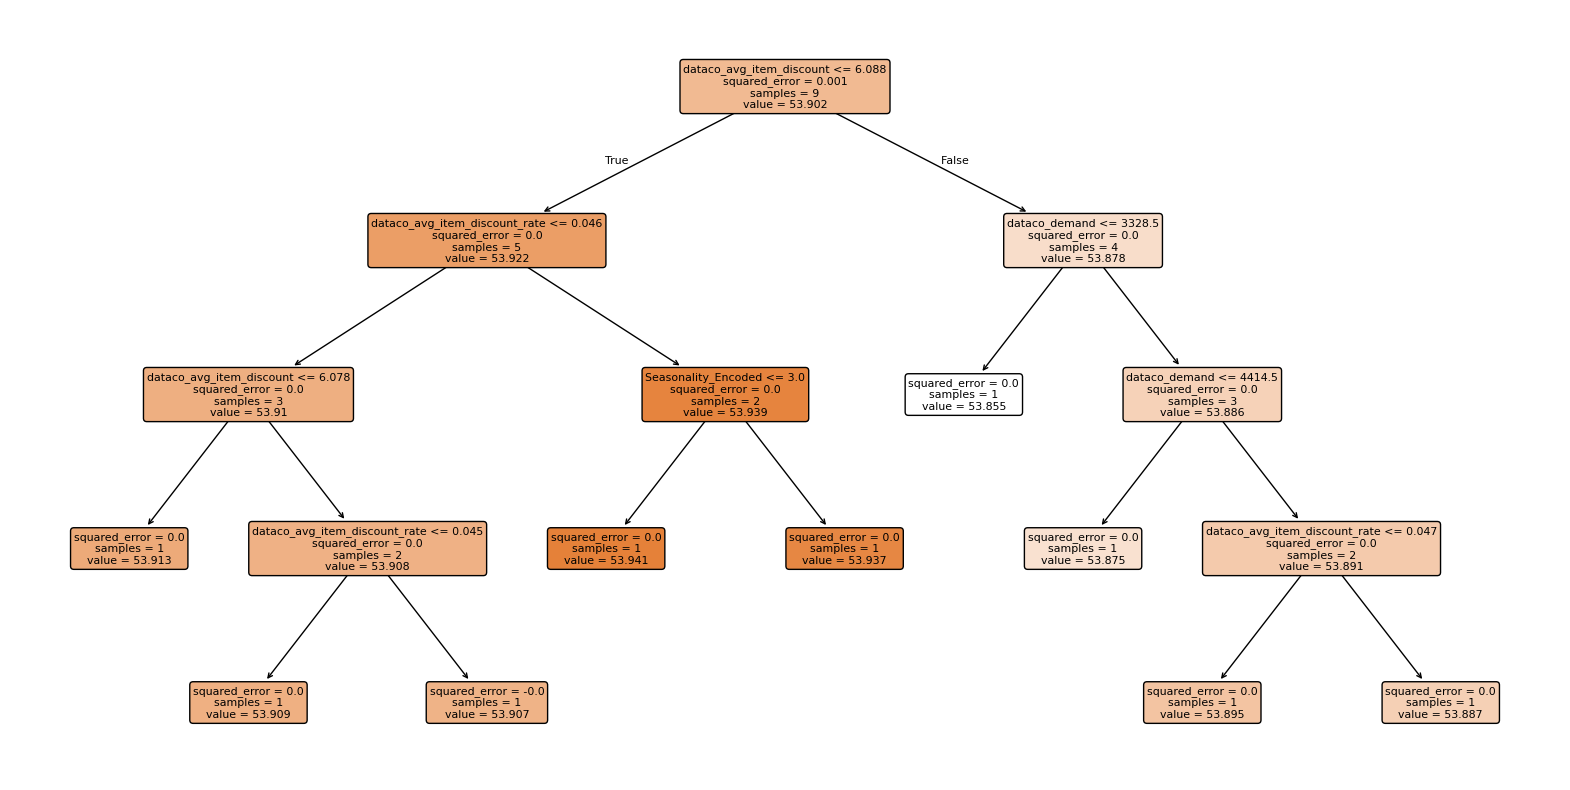

In [5]:
# Assuming 'model' is your trained decision tree
plt.figure(figsize=(20, 10))  # Adjust the size as needed for better readability
plot_tree(
    sklearn_model,
    feature_names=X_train.columns,  # Use the column names from your training set
    class_names=True,               # If it's a classifier, you can show class names
    filled=True,                    # Color nodes to show majority class
    rounded=True                    # Rounded boxes for nodes
)
plt.show()

In [6]:
df_prep.columns

Index(['dataco_avg_item_discount', 'dataco_avg_item_discount_rate',
       'dataco_demand', 'Final Price', 'price_elasticity_of_demand',
       'Seasonality_Encoded'],
      dtype='object')

# sklearn DT with dataco + competitor

In [7]:
merged_prep

,dataco_avg_item_discount,dataco_avg_item_discount_rate,dataco_demand,Final Price,price_elasticity_of_demand,olist_product_demand,olist_avg_discount_rate,Seasonality_Encoded
0,6.103950,0.047352,4458,53.885548,0.000000,343,0.103372,2
1,6.080249,0.045197,4183,53.909197,15.886807,358,0.101948,2
2,6.102391,0.046820,4616,53.887104,28.426105,402,0.093586,2
3,6.048270,0.046493,4449,53.941215,4.079349,341,0.109392,2
4,6.082337,0.045610,4650,53.907134,8.021224,385,0.095692,4
5,6.052498,0.046429,4115,53.936995,23.453034,320,0.105496,4
6,6.094378,0.046274,4533,53.895096,14.680351,427,0.105405,2
7,6.076281,0.045878,4624,53.913168,-6.760317,449,0.101784,3
8,6.114401,0.047195,4296,53.875093,-11.306770,231,0.092020,2
9,6.036138,0.045409,2278,53.953347,36.699026,264,0.102222,2


In [8]:
X = merged_prep.drop(columns=['Final Price'])
y = merged_prep['Final Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
sklearn_model = DecisionTreeRegressor(max_depth=4, random_state=42)
sklearn_model.fit(X_train, y_train)

# Predict on test set and evaluate
y_pred = sklearn_model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error: {mape:.2%}")
print(f"Mean Absolute Error: {mae}")


Mean Absolute Percentage Error: 0.04%
Mean Absolute Error: 0.022104512228293533


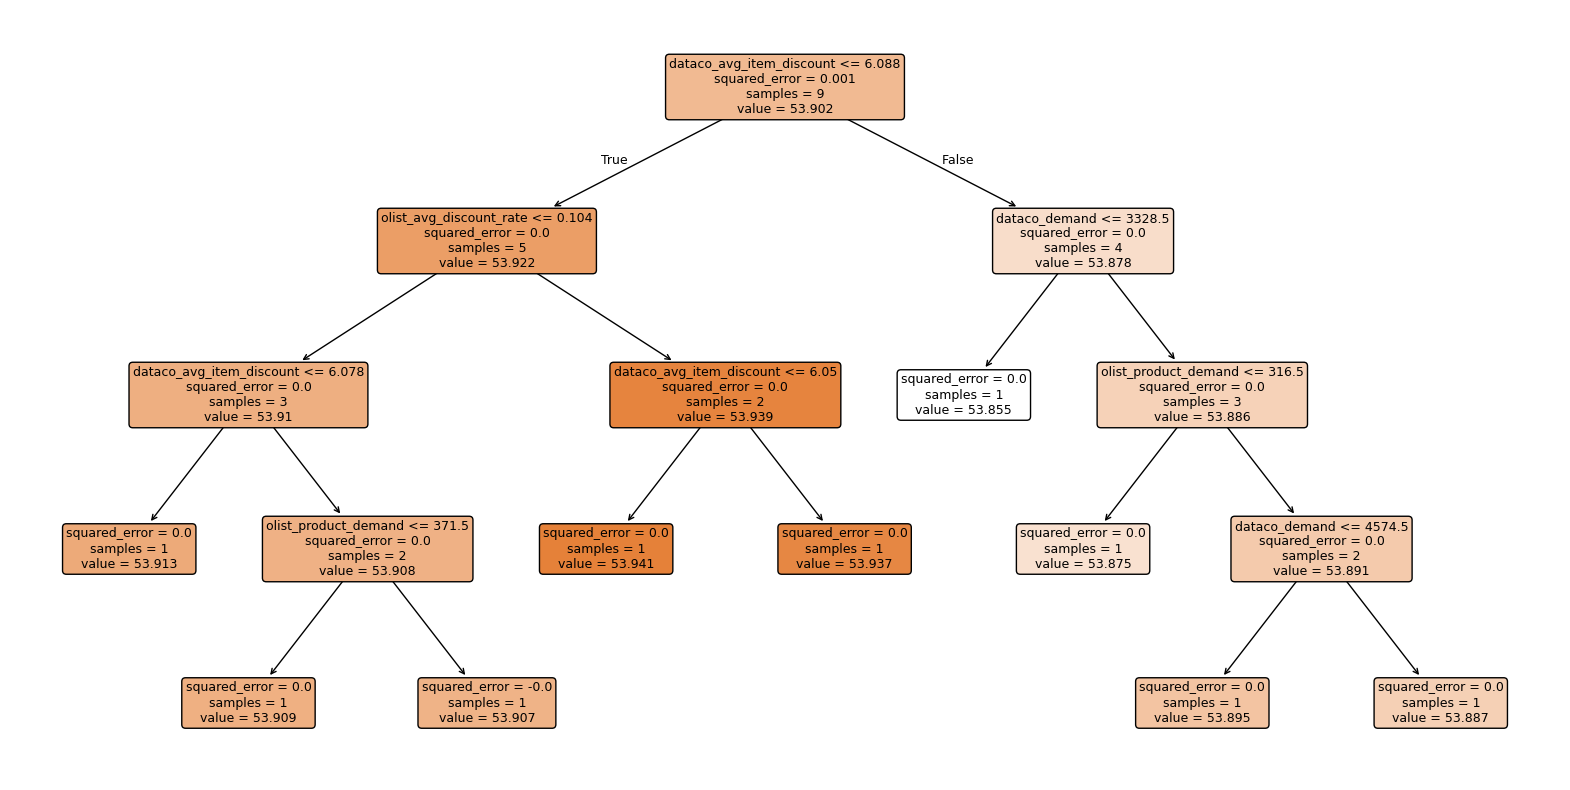

In [9]:
# Assuming 'model' is your trained decision tree
plt.figure(figsize=(20, 10))  # Adjust the size as needed for better readability
plot_tree(
    sklearn_model,
    feature_names=X_train.columns,  # Use the column names from your training set
    class_names=True,               # If it's a classifier, you can show class names
    filled=True,                    # Color nodes to show majority class
    rounded=True                    # Rounded boxes for nodes
)
plt.show()

In [10]:
X_test.columns

Index(['dataco_avg_item_discount', 'dataco_avg_item_discount_rate',
       'dataco_demand', 'price_elasticity_of_demand', 'olist_product_demand',
       'olist_avg_discount_rate', 'Seasonality_Encoded'],
      dtype='object')

# Analysis + Test Cases

For proof of concept and for the sake of interpretability, we will use the sklearn model (with the merged dataco and olist dataset) and decision tree plot for our analyses.

In [11]:
merged_prep.columns

Index(['dataco_avg_item_discount', 'dataco_avg_item_discount_rate',
       'dataco_demand', 'Final Price', 'price_elasticity_of_demand',
       'olist_product_demand', 'olist_avg_discount_rate',
       'Seasonality_Encoded'],
      dtype='object')

In [12]:
X = merged_prep.drop(columns=['Final Price'])
y = merged_prep['Final Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
sklearn_model = DecisionTreeRegressor(max_depth=4, random_state=42)
sklearn_model.fit(X_train, y_train)

# Predict on test set and evaluate
y_pred = sklearn_model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error: {mape:.2%}")
print(f"Mean Absolute Error: {mae}")


Mean Absolute Percentage Error: 0.04%
Mean Absolute Error: 0.022104512228293533


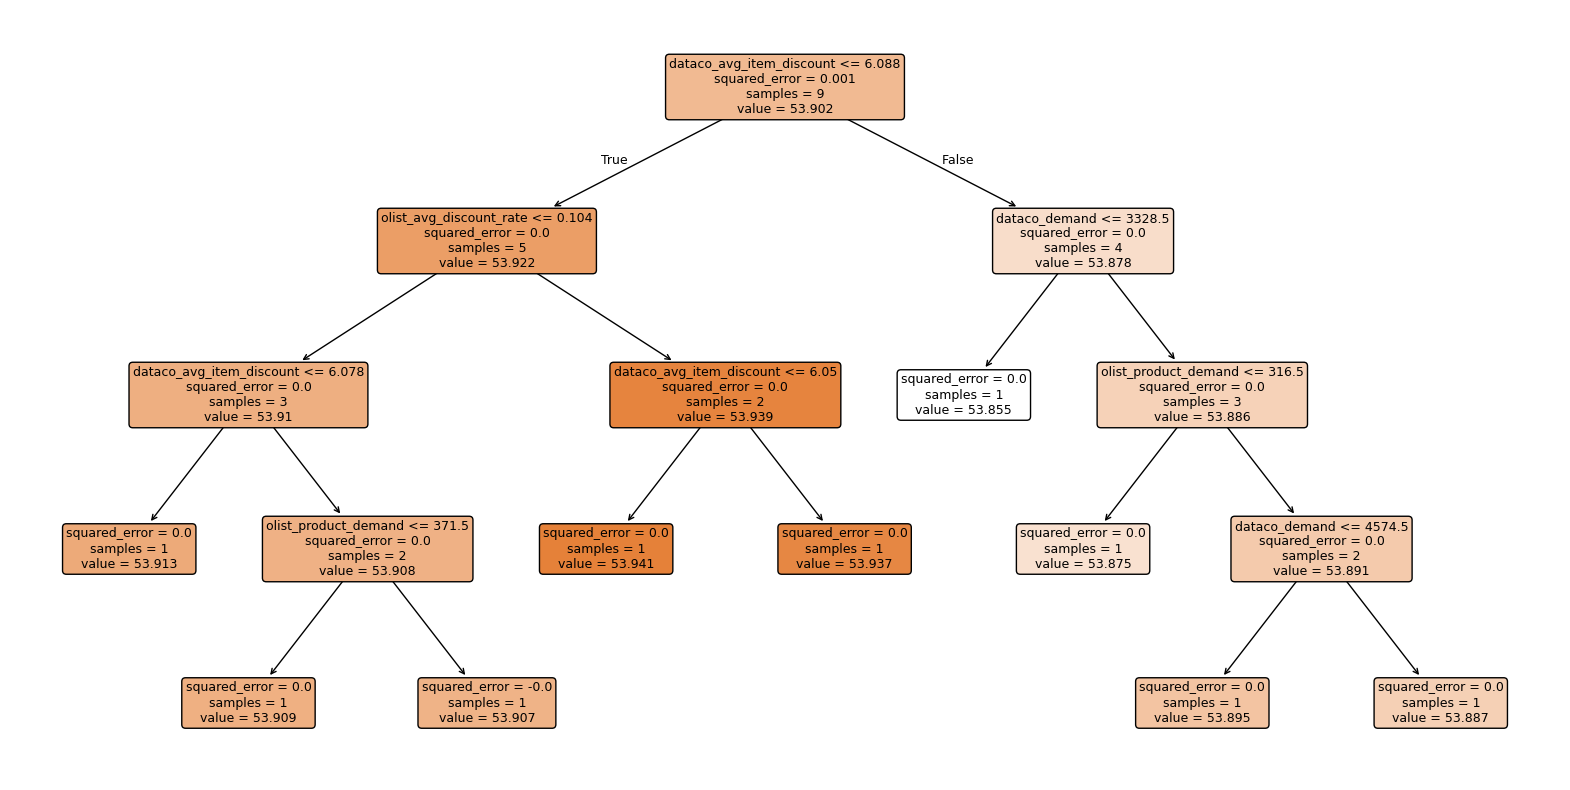

In [13]:
plt.figure(figsize=(20, 10))  # Adjust the size as needed for better readability
plot_tree(
    sklearn_model,
    feature_names=X_train.columns.tolist(),  # Convert columns to list
    filled=True,                             # Color nodes to show feature importance
    rounded=True                             # Rounded boxes for nodes
)
plt.show()

In [14]:
X_test.columns

Index(['dataco_avg_item_discount', 'dataco_avg_item_discount_rate',
       'dataco_demand', 'price_elasticity_of_demand', 'olist_product_demand',
       'olist_avg_discount_rate', 'Seasonality_Encoded'],
      dtype='object')

In [15]:
X_test

,dataco_avg_item_discount,dataco_avg_item_discount_rate,dataco_demand,price_elasticity_of_demand,olist_product_demand,olist_avg_discount_rate,Seasonality_Encoded
10,6.059710,0.045418,2260,-2.023382,324,0.096800,1
9,6.036138,0.045409,2278,36.699026,264,0.102222,2
0,6.103950,0.047352,4458,0.000000,343,0.103372,2


# Test iteration to find Max revenue generated

In [16]:
# Define ranges for each column
test_ranges = {
    'dataco_avg_item_discount': np.arange(5, 15, 0.5),  # Adjust the range as needed
    'dataco_avg_item_discount_rate': np.arange(0.02, 0.1, 0.01),
    'dataco_demand': np.arange(100, 1000, 100),
    'price_elasticity_of_demand': np.arange(-20, 20, 5),
    'olist_product_demand': np.arange(100, 1000, 100),
    'olist_avg_discount_rate': np.arange(0.02, 0.1, 0.01),
    'Seasonality_Encoded': np.arange(0, 5, 1)  # Assuming seasonality has 5 encoded values
}

# Generate all combinations of test cases
test_cases = list(product(*test_ranges.values()))

# Create a DataFrame of test cases
test_df = pd.DataFrame(test_cases, columns=test_ranges.keys())

predictions = sklearn_model.predict(test_df)

In [17]:
test_df

,dataco_avg_item_discount,dataco_avg_item_discount_rate,dataco_demand,price_elasticity_of_demand,olist_product_demand,olist_avg_discount_rate,Seasonality_Encoded
0,5.0,0.02,100,-20,100,0.02,0
1,5.0,0.02,100,-20,100,0.02,1
2,5.0,0.02,100,-20,100,0.02,2
3,5.0,0.02,100,-20,100,0.02,3
4,5.0,0.02,100,-20,100,0.02,4
...,...,...,...,...,...,...,...
4147195,14.5,0.09,900,15,900,0.09,0
4147196,14.5,0.09,900,15,900,0.09,1
4147197,14.5,0.09,900,15,900,0.09,2
4147198,14.5,0.09,900,15,900,0.09,3


In [18]:
pd.DataFrame(predictions)

,0
0,53.913168
1,53.913168
2,53.913168
3,53.913168
4,53.913168
...,...
4147195,53.854591
4147196,53.854591
4147197,53.854591
4147198,53.854591


In [19]:
ans = pd.DataFrame(predictions)
test_df['predicted_values'] = ans
test_df['predicted_revenue'] = test_df['predicted_values'] * test_df['dataco_demand'] * test_df['dataco_avg_item_discount_rate']

In [20]:
# Get row with highest revenue
# Sort by 'predicted_revenue' in descending order
test_df = test_df.sort_values(by='predicted_revenue', ascending=False)

# Get the row with the maximum predicted revenue
max_predicted_revenue_row = test_df.iloc[0]

# Print the row with the maximum predicted revenue
print(max_predicted_revenue_row)


dataco_avg_item_discount            6.000000
dataco_avg_item_discount_rate       0.090000
dataco_demand                     900.000000
price_elasticity_of_demand        -20.000000
olist_product_demand              100.000000
olist_avg_discount_rate             0.020000
Seasonality_Encoded                 0.000000
predicted_values                   53.913168
predicted_revenue                4366.966634
Name: 619200, dtype: float64


In [21]:
output_file = os.path.join(pricing_results_dir, "max_predicted_revenue.txt")

# Save the row to a text file
with open(output_file, "w") as file:
    file.write(max_predicted_revenue_row.to_string())
